In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
# Data Preparation

In [4]:
# Read the CVS

cryptodata_df = pd.read_csv("crypto_data.csv")
cryptodata_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
# Analyze 

cryptodata_df.columns

Index(['Unnamed: 0', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply'],
      dtype='object')

In [6]:
# Discard all cryptocurrencies that are not being traded

clean_df = cryptodata_df[cryptodata_df["IsTrading"] == True] 
clean_df = clean_df.drop("IsTrading", axis=1)
clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Remove all rows that have at least one null value

clean_df = clean_df.dropna()
clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero

clean_df = clean_df[clean_df['TotalCoinsMined'] > 0]
clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# delete the CoinName from the original dataframe

clean_df = clean_df.drop(columns = 'CoinName')
clean_df = clean_df.drop(columns = 'Unnamed: 0')
clean_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data

clean_df = pd.get_dummies(clean_df, columns = ['Algorithm', 'ProofType'])
clean_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome

scaler = StandardScaler()
standardized_df = scaler.fit_transform(clean_df)
standardized_df

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [12]:
# Dimensionality Reduction

In [17]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components = 0.90)
crypto_pca = pca.fit_transform(standardized_df)
crypto_pca = pd.DataFrame(crypto_pca)
crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,1.929142e-14,2.991189e-14,-2.612413e-14,-0.007129,-1.319756,-0.051813,...,1.479476e-15,1.008610e-15,-3.871957e-15,-1.191582e-15,-1.722746e-15,-2.248796e-15,-3.559834e-16,-2.666536e-15,-2.501604e-15,-3.516646e-15
1,-0.318434,1.032331,-0.591126,0.001386,1.925714e-14,2.989374e-14,-2.610632e-14,-0.007739,-1.322514,-0.056674,...,1.539607e-15,2.931104e-16,-4.807668e-15,-1.841180e-15,-2.201622e-15,-2.055056e-15,-9.527086e-16,-3.483156e-15,-2.438896e-15,-3.355716e-15
2,2.305468,1.656383,-0.683617,0.004731,3.488344e-14,4.115801e-14,-4.035029e-14,-0.054781,-1.542879,-0.943951,...,9.894775e-14,8.318686e-17,1.465144e-14,9.013616e-14,4.502192e-14,3.946335e-14,4.321636e-14,-9.753458e-15,-1.503823e-14,2.719202e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-1.127958e-14,-1.125201e-14,1.049066e-14,-0.002071,0.281463,0.251862,...,-1.332471e-14,-1.728682e-14,-8.673343e-15,2.783853e-14,6.256828e-15,-2.240800e-15,6.327362e-15,1.133065e-14,-3.682453e-15,-1.896724e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-2.614009e-14,-2.443139e-14,1.795027e-14,0.027735,0.519099,0.188820,...,-2.847455e-14,-5.007471e-14,-1.035828e-13,9.175492e-14,-5.304578e-16,-9.454992e-14,1.091335e-13,1.888631e-13,-1.316779e-13,-1.530383e-13


In [19]:
tsne = TSNE(learning_rate=40)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

C:\Users\soniav712\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


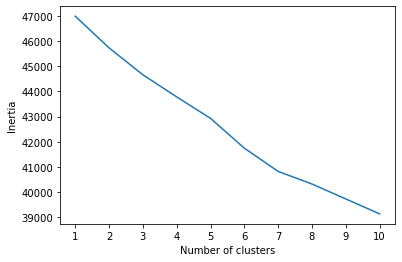

In [24]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()